In [1]:
from databaseCommunication import readDatabaseFile, createDataFrame_list
from dataframeFormating import createLabeledDataFrame_list #, N_polarized_pure3b, N_polarized, N_linear, getReducedDataframe, getReducedResults, 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
label_heads = ['latticeDetuning', 'random']
labels = [[['-40'], [137626, 137796]],
          [['-40'], [137811, 138038]]
                 ]

excluded = []

In [10]:
ciceroVariables = ['BECHoldTime', 'TOF', 'latticeDepth', 'ODT3_Comp', 'Y_rotation']
fitVariables = ['nCount', 'xWidth', 'yWidth']

df = createLabeledDataFrame_list(labels, label_heads, ciceroVariables, fitVariables)
for column in df.columns:
    try:
        df[column] = df[column].astype(float)
    except:
        pass
df['Y_rotation'] = df['Y_rotation'].astype(bool)
df.to_pickle('data_save_210423.pickle')

['latticeDetuning', 'random']
       BECHoldTime           TOF  latticeDepth ODT3_Comp Y_rotation    nCount  \
0    10.0000000000  7.0000000000  0.0500000000     0E-10      0E-10   91714.0   
1            0E-10  7.0000000000  0.0500000000     0E-10      0E-10  106564.0   
2   800.0000000000  7.0000000000  0.0500000000     0E-10      0E-10   51684.0   
3    60.0000000000  7.0000000000  0.0500000000     0E-10      0E-10   91917.0   
4     6.0000000000  7.0000000000  0.0500000000     0E-10      0E-10   94391.0   
5    10.0000000000  7.0000000000  0.6000000000     0E-10      0E-10   86787.0   
6   400.0000000000  7.0000000000  0.6000000000     0E-10      0E-10   59284.0   
7     2.0000000000  7.0000000000  0.6000000000     0E-10      0E-10   93418.0   
8    40.0000000000  7.0000000000  0.6000000000     0E-10      0E-10   77206.0   
9   200.0000000000  7.0000000000  0.6000000000     0E-10      0E-10   67716.0   
10   15.0000000000  7.0000000000  0.6000000000     0E-10      0E-10   90893.0  

In [11]:
df = pd.read_pickle('data_save_210423.pickle')
# Delete these row indexes from dataFrame
indexNames = pd.Index(np.where(df['imageID'].isin(excluded))[0])
df.drop(indexNames, inplace = True)

In [12]:
df

,BECHoldTime,TOF,latticeDepth,ODT3_Comp,Y_rotation,nCount,xWidth,yWidth,imageID,latticeDetuning,random
0,10.0,7.0,0.05,0.0,False,91714.0,13.5463,14.4602,137626.0,-40.0,test1
1,0.0,7.0,0.05,0.0,False,106564.0,13.0901,15.4576,137627.0,-40.0,test1
2,800.0,7.0,0.05,0.0,False,51684.0,12.6866,12.1816,137628.0,-40.0,test1
3,60.0,7.0,0.05,0.0,False,91917.0,12.7931,14.2316,137629.0,-40.0,test1
4,6.0,7.0,0.05,0.0,False,94391.0,13.3317,13.8452,137630.0,-40.0,test1
5,10.0,7.0,0.60,0.0,False,86787.0,23.7809,16.8538,137811.0,-40.0,test2
6,400.0,7.0,0.60,0.0,False,59284.0,35.9795,17.3854,137812.0,-40.0,test2
7,2.0,7.0,0.60,0.0,False,93418.0,21.2053,17.1177,137813.0,-40.0,test2
8,40.0,7.0,0.60,0.0,False,77206.0,29.5865,14.9375,137814.0,-40.0,test2
9,200.0,7.0,0.60,0.0,False,67716.0,32.7527,17.3149,137815.0,-40.0,test2


In [244]:
latticeDepthList = df['latticeDepth'].unique()
Y_rotationList = df['Y_rotation'].unique()
BECHoldTimeList = df['BECHoldTime'].unique()
latticeDetuningList = df['latticeDetuning'].unique()

In [246]:
np.sort(BECHoldTimeList)

array([0.0e+00, 5.0e-01, 1.0e+00, 2.0e+00, 3.0e+00, 4.0e+00, 5.0e+00,
       6.0e+00, 8.0e+00, 1.0e+01, 1.2e+01, 1.5e+01, 2.0e+01, 3.0e+01,
       5.0e+01, 1.0e+02, 2.0e+02, 4.0e+02, 1.0e+03])

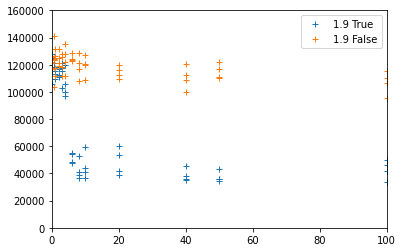

In [230]:
def getRun(df, latticeDepth, latticeDetuning = 25):
    df_temp = df[df['latticeDepth'] == latticeDepth]
    df_temp2 = df_temp[df_temp['latticeDetuning'] == latticeDetuning]
    return df_temp

plt.figure()
for latticeDepth in [1.9]:
    df_temp = getRun(df, latticeDepth, latticeDetuning = 25)
    plt.plot(df_temp['BECHoldTime'], df_temp['nCount'], '+', label = str(round(latticeDepth, 2)))
plt.legend()
plt.ylim(0, 160000)
plt.xlim(0,100)
plt.show()

In [231]:
results = []

from scipy.optimize import curve_fit

def N_polarized(t, N0, alpha, gamma):
    return np.sqrt(alpha / (np.exp(2*alpha*t)*(alpha/(N0**2)+gamma)-gamma))

def N_linear(t, N0, b):
    return N0-b*t

def N_polarized_pure3b(t, N0, gamma):
    return N0 / np.sqrt(1+N0**2*gamma*t)

def fitRun(df_run):
    N0_guess = max(df_run['nCount'])
    time_guess = max(df_run['BECHoldTime'])
    popt, pcov = curve_fit(N_polarized, df_run['BECHoldTime'], df_run['nCount'],
                       p0 = [N0_guess, 1/time_guess, 1/(N0_guess**2*time_guess)],
                        bounds = ((0, 0, 0), (np.inf, np.inf, np.inf)),
                           method = 'trf'
                      )
    return popt, pcov

for latticeDetuning in latticeDetuningList:
    for latticeDepth in latticeDepthList:
        df_run = getRun(df, latticeDepth, Y_rotation, latticeDetuning)
        #print(latticeDetuning, latticeDepth)
        if not df_run.empty:
            popt, pcov = fitRun(df_run)
            results += [{'latticeDetuning' : latticeDetuning,
                             'latticeDepth' : latticeDepth,
                             'Y_rotation' : Y_rotation,
                            'N0' : popt[0],
                            'alpha' : popt[1],
                             'gamma' : popt[2]
                        }]
resultsDF = pd.DataFrame(results)
print('\n')
print(resultsDF)
#perr = np.sqrt(np.diag(pcov))



    latticeDetuning  latticeDepth  Y_rotation             N0         gamma
0              25.0         0.060        True  100328.885256  4.365805e-12
1              25.0         0.060       False  105625.630289  1.085964e-12
2              25.0         0.200        True   96451.206492  6.698761e-12
3              25.0         0.200       False  103345.214754  6.684402e-13
4              25.0         0.100        True  103106.423470  6.964689e-12
5              25.0         0.100       False  105887.605002  8.125783e-13
6              25.0         0.150        True   96712.860726  5.383640e-12
7              25.0         0.150       False  103454.088749  6.208689e-13
8              25.0         0.020        True   97391.652422  2.855896e-12
9              25.0         0.020       False  103532.426020  1.162597e-12
10             25.0         0.080        True  103005.332866  6.003879e-12
11             25.0         0.080       False  105191.579182  8.330133e-13
12             25.0    

In [232]:
def getResult(dfResult, latticeDepth, Y_rotation, latticeDetuning = 25):
    df_temp = dfResult[dfResult['latticeDepth'] == latticeDepth]
    df_temp2 = df_temp[df_temp['Y_rotation'] == Y_rotation]
    df_temp3 = df_temp2[df_temp2['latticeDetuning'] == latticeDetuning]
    return df_temp3

latticeDepth = 1.9
latticeDetuning = 5

df_tempY = getRun(df, latticeDepth, True, latticeDetuning)
df_tempZ = getRun(df, latticeDepth, False, latticeDetuning)
resultY = getResult(resultsDF, latticeDepth, True, latticeDetuning)
resultZ = getResult(resultsDF, latticeDepth, False, latticeDetuning)

time = np.linspace(0, 100, 10000)
NY, gammaY = resultY.iloc[0, 3], resultY.iloc[0, 4]
NZ, gammaZ = resultZ.iloc[0, 3], resultZ.iloc[0, 4]
Y = N_polarized_pure3b(time, NY, gammaY)
Z = N_polarized_pure3b(time, NZ, gammaZ)

plt.figure()
plt.plot(df_tempY['BECHoldTime'], df_tempY['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(True))
plt.plot(df_tempZ['BECHoldTime'], df_tempZ['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(False))
plt.plot(time, Y, '-', label = 'fitY')
plt.plot(time, Z, '-', label = 'fitZ')
plt.legend()
plt.ylim(0, 150000)
plt.xlim(0,50)
plt.show()

IndexError: single positional indexer is out-of-bounds

In [217]:
max(df_tempY['nCount']), max(df_tempY['BECHoldTime'])

ValueError: max() arg is an empty sequence

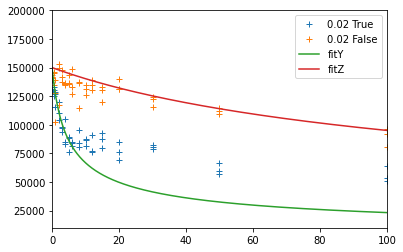

In [209]:
def getResult(dfResult, latticeDepth, Y_rotation, latticeDetuning = 25):
    df_temp = dfResult[dfResult['latticeDepth'] == latticeDepth]
    df_temp2 = df_temp[df_temp['Y_rotation'] == Y_rotation]
    df_temp3 = df_temp2[df_temp2['latticeDetuning'] == latticeDetuning]
    return df_temp3

latticeDepth = 0.02
latticeDetuning = 5
N0_guess, 1/time_guess, 1/(N0_guess**2*time_guess)
df_tempY = getRun(df, latticeDepth, True, latticeDetuning)
df_tempZ = getRun(df, latticeDepth, False, latticeDetuning)
resultY = getResult(resultsDF, latticeDepth, True, latticeDetuning)
resultZ = getResult(resultsDF, latticeDepth, False, latticeDetuning)

time = np.linspace(0, 1000, 10000)
NY, alphaY, gammaY = resultY.iloc[0, 3], resultY.iloc[0, 4], resultY.iloc[0, 5]
NZ, alphaZ, gammaZ = resultZ.iloc[0, 3], resultZ.iloc[0, 4], resultZ.iloc[0, 5]

NY = 150000
NZ = 150000 
alphaY = 0.001*10**(-4)
gammaY = 9*10**(-12)
alphaZ = 4*10**(-4)
gammaZ = 3*10**(-13)

Y = N_polarized(time, NY, alphaY, gammaY)
Z = N_polarized(time, NZ, alphaZ, gammaZ)

plt.figure()
plt.plot(df_tempY['BECHoldTime'], df_tempY['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(True))
plt.plot(df_tempZ['BECHoldTime'], df_tempZ['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(False))
plt.plot(time, Y, '-', label = 'fitY')
plt.plot(time, Z, '-', label = 'fitZ')
plt.legend()
plt.ylim(10000,200000)
plt.xlim(0,100)
plt.show()

In [58]:
NY, NZ

(154672.64381833852, 165010.54406426026)

In [237]:
results_ratio = []
for latticeDetuning in latticeDetuningList:
    reducedResult = resultsDF[resultsDF['latticeDetuning'] == latticeDetuning]
    for latticeDepth in latticeDepthList:
        reducedResult2 = reducedResult[reducedResult['latticeDepth'] == latticeDepth]
        gammaY, gammaZ = reducedResult2[reducedResult2['Y_rotation'] == True]['gamma'].mean(), reducedResult2[reducedResult2['Y_rotation'] == False]['gamma'].mean()
        results_ratio += [{'latticeDetuning' : latticeDetuning,
                         'latticeDepth' : latticeDepth,
                        'gamma_ratio' : gammaY/gammaZ}]
results_ratioDF = pd.DataFrame(results_ratio)
results_ratioDF

,latticeDetuning,latticeDepth,gamma_ratio
0,25.0,0.060,4.020212
1,25.0,0.200,10.021481
2,25.0,0.100,8.571098
3,25.0,0.150,8.671139
4,25.0,0.020,2.456479
5,25.0,0.080,7.207422
6,25.0,0.300,28.228929
7,25.0,0.010,2.098364
8,25.0,0.006,2.752485
9,25.0,0.500,41.837410


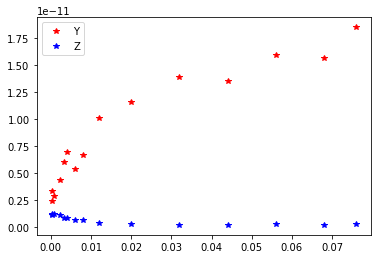

In [238]:
resultsDF_Y = resultsDF[resultsDF['Y_rotation'] == True]
resultsDF_Z = resultsDF[resultsDF['Y_rotation'] == False]
plt.figure()
plt.plot(resultsDF_Y['latticeDepth']/resultsDF_Y['latticeDetuning'], resultsDF_Y['gamma'], 'r*', label = 'Y')
plt.plot(resultsDF_Z['latticeDepth']/resultsDF_Z['latticeDetuning'], resultsDF_Z['gamma'], 'b*', label = 'Z')
plt.legend()
#plt.ylim(0,0.2*10**(-11))
plt.show()

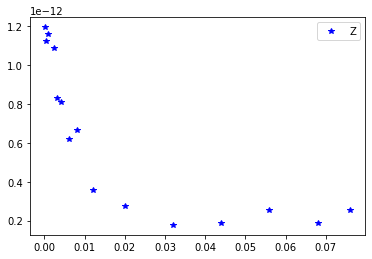

In [239]:
plt.figure()
plt.plot(resultsDF_Z['latticeDepth']/resultsDF_Z['latticeDetuning'], resultsDF_Z['gamma'], 'b*', label = 'Z')
plt.legend()
plt.show()

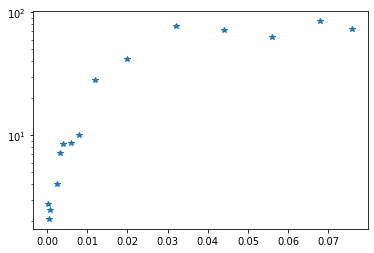

In [240]:
plt.figure()
plt.semilogy(results_ratioDF['latticeDepth']/results_ratioDF['latticeDetuning'], results_ratioDF['gamma_ratio'], '*')
#plt.xlim(0,0.01)
plt.show()

In [70]:
results_ratioDF[results_ratioDF['gamma_ratio'] > 100]

,latticeDetuning,latticeDepth,gamma_ratio
12,25.0,1.4,2062.149702


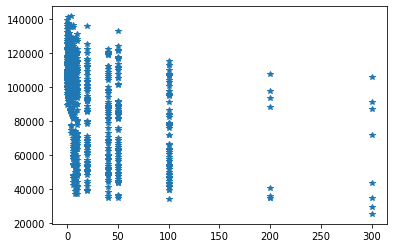

In [71]:
plt.figure()
plt.plot(df['BECHoldTime'], df['nCount'], '*')
plt.show()

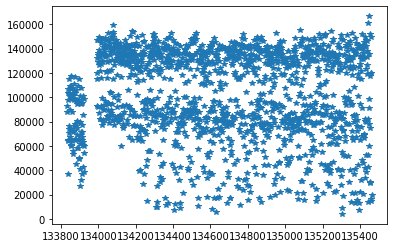

In [134]:
plt.figure()
plt.plot(df['imageID'], df['nCount'], '*')
plt.show()

In [13]:
list_label = [] + [[1, 2, 3]] + [[4, 5, 6]] + [[11, 13, 15]]
list_label_array = np.array(list_label)
df = pd.DataFrame({'test' : [100, 1000, 10000]})
df['a'] = list_label_array[0,:]

In [10]:
import numpy as np
import pandas as pd

In [15]:
list_label[0,:]

TypeError: list indices must be integers or slices, not tuple